In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
from keras import utils as np_utils
import tensorflow as tf
from tensorflow import keras

In [2]:
pip install numpy==1.19.5

Note: you may need to restart the kernel to use updated packages.


Data_Loading

In [3]:

X = np.load("Thesis/Prepared/Not_Writng_Not/DeltaX&DeltaY/Delta_XX_Data.npy",allow_pickle=True)
Y = np.load("Thesis/Prepared/Not_Writng_Not/DeltaX&DeltaY/Delta_YY_Data.npy",allow_pickle=True)

#y_train = np.load("Prepared/Not_Writng_Not/N_W_Y_train.npy")
#y_test = np.load("Prepared/Not_Writng_Not/N_W_Y_test.npy")

#X_train = np.load("Prepared/Not_Writng_Not/X&Y_Co-ordinates/N_W_X_train.npy",allow_pickle=True)
#X_test = np.load("Prepared/Not_Writng_Not/X&Y_Co-ordinates/N_W_X_test.npy",allow_pickle=True)
#y_train = np.load("Prepared/Not_Writng_Not/X&Y_Co-ordinates/N_W_Y_train.npy",allow_pickle=True)
#y_test = np.load("Prepared/Not_Writng_Not/X&Y_Co-ordinates/N_W_Y_test.npy",allow_pickle=True)

X_train, X_test, y_train , y_test  = train_test_split(X, Y, test_size = 0.30, random_state = 150, shuffle=True)


X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

FileNotFoundError: [Errno 2] No such file or directory: 'Thesis/Prepared/Not_Writng_Not/DeltaX&DeltaY/Delta_XX_Data.npy'

In [7]:
#X_train = np.reshape(X_train,(8557,196,1))
#X_test = np.reshape(X_test,(3533,196,1))
X_train.shape                

(8463, 2, 98)

In [8]:
X_test.shape

(3627, 2, 98)

Model

In [23]:
model = Sequential()

In [24]:
model = Sequential()
model.add(Bidirectional(LSTM(100,return_sequences=True, input_shape=(2,98))))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Bidirectional(LSTM(150,return_sequences=True)))
model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.3))
model.add(Dense(units = 2, activation='softmax'))

In [25]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Training

In [26]:
history = model.fit(X_train, y_train,epochs=75, batch_size=64)

Epoch 1/75
133/133 [==============================] - 15s 31ms/step - loss: 0.5135 - accuracy: 0.7477
Epoch 2/75
133/133 [==============================] - 5s 35ms/step - loss: 0.2895 - accuracy: 0.8760
Epoch 3/75
133/133 [==============================] - 5s 37ms/step - loss: 0.2575 - accuracy: 0.8880
Epoch 4/75
133/133 [==============================] - 5s 40ms/step - loss: 0.2408 - accuracy: 0.9036
Epoch 5/75
133/133 [==============================] - 5s 41ms/step - loss: 0.2291 - accuracy: 0.9030
Epoch 6/75
133/133 [==============================] - 6s 42ms/step - loss: 0.2191 - accuracy: 0.9076
Epoch 7/75
133/133 [==============================] - 6s 44ms/step - loss: 0.2064 - accuracy: 0.9186
Epoch 8/75
133/133 [==============================] - 6s 45ms/step - loss: 0.1857 - accuracy: 0.9266
Epoch 9/75
133/133 [==============================] - 7s 51ms/step - loss: 0.1839 - accuracy: 0.9266
Epoch 10/75
133/133 [==============================] - 7s 52ms/step - loss: 0.1790 - accur

In [27]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 2, 200)            159200    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 2, 200)            240800    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 2, 300)            421200    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 400)               801600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 802       
Total params: 1,623,602
Trainable params: 1,623,602
Non-trainable params: 0
____________________________________________

Testing

In [28]:
# fit the model
preds = model.predict(X_test)

In [29]:
predict = np.argmax(preds,axis = 1)
predict


array([0, 0, 0, ..., 0, 0, 1])

In [30]:
model.evaluate(X_test,y_test)

114/114 [==============================] - 4s 9ms/step - loss: 0.4092 - accuracy: 0.9203


[0.4092452824115753, 0.9203197956085205]

In [31]:
y_train = np.array(y_train)

In [32]:
y_test.shape

(3627, 2)

In [33]:
y_test = np.argmax(y_test,axis = 1)
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [41]:
from sklearn.metrics import accuracy_score

print("Accuracy Score = ", accuracy_score(y_test, predict))

Accuracy Score =  0.92031982354563


Evaluation

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, predict)

cm

array([[2283,  141],
       [ 148, 1055]])

In [48]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,8),
                           fontsize=14, normalize=True):
     
    if normalize:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt= fmt)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

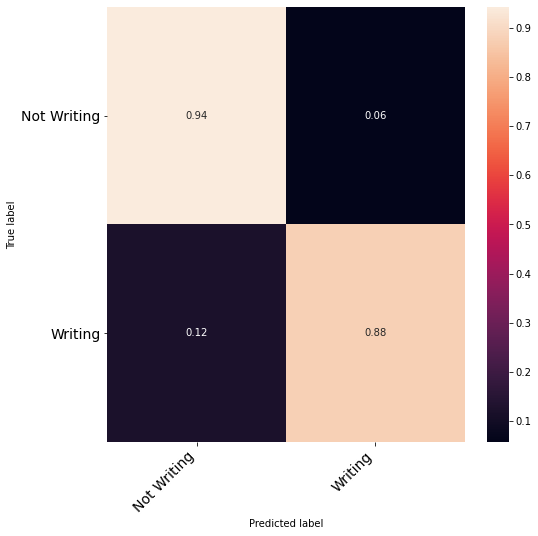

In [51]:
import seaborn as sns

class_names = ['Not Writing','Writing']
print_confusion_matrix(cm, class_names)
plt.savefig('Confusion_Matrix_BLSTM(x,y).png', dpi=300)

In [52]:
report = classification_report(y_test, predict,target_names=['Not_Writng', 'Writng'])
print(report)

              precision    recall  f1-score   support

  Not_Writng       0.94      0.94      0.94      2424
      Writng       0.88      0.88      0.88      1203

    accuracy                           0.92      3627
   macro avg       0.91      0.91      0.91      3627
weighted avg       0.92      0.92      0.92      3627



In [53]:
from collections import Counter


correct = [pred == true for pred, true in zip(predict, y_test)]
correct = np.array(correct).flatten()
print(Counter(correct))

Counter({True: 3338, False: 289})


In [54]:
YY = np.array(y_test).flatten()
classifiedIndexes = np.where(YY==predict)[0]
misclassifiedIndexes = np.where(YY!=predict)[0]

In [79]:
A = 789
P = predict[A]
Y = y_test[A]

Y

0.0

In [80]:
P

0

In [81]:
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')
X_test = np.reshape(X_test,(3627,2,98))

In [82]:
y_test.shape

(3627,)

In [83]:
X = X_test[A]
XX = X

In [84]:
y_test[A]

0.0

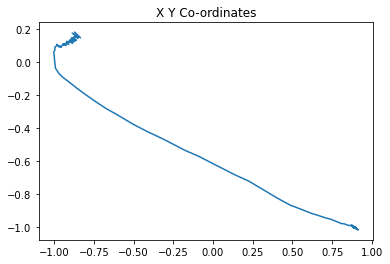

In [85]:
import matplotlib.pyplot as plt

x = XX[0]
y = XX[1]

plt.plot(x, y)
plt.title('X Y Co-ordinates')
plt.savefig("0_MC2_1.png")

plt.show()